<a href="https://colab.research.google.com/github/harim061/FakeNewsDetection/blob/main/FND4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pickle
from sklearn.linear_model import LogisticRegressionCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import time
start = time.time()

In [4]:
path = '/content/drive/MyDrive/fakeData/'

In [5]:
fake_df = pd.read_csv(path +'Fake.csv')
real_df = pd.read_csv(path +'True.csv')

In [6]:
fake_df = fake_df[['title', 'text']]
real_df = real_df[['title', 'text']]

In [7]:
fake_df['check'] = 0
real_df['check'] = 1
df = pd.concat([fake_df, real_df], ignore_index=True, sort=False)

<ipython-input-7-d8a84075019a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_df['check'] = 0


In [8]:
df.head()

,title,text,check
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0


In [9]:
df.shape

(44898, 3)

In [10]:
df['title_text'] = df['title'] + ' ' + df['text']
df.drop(['title', 'text'], axis=1, inplace=True)

In [11]:
df.head()

,check,title_text
0,0,Donald Trump Sends Out Embarrassing New Year’...
1,0,Drunk Bragging Trump Staffer Started Russian ...
2,0,Sheriff David Clarke Becomes An Internet Joke...
3,0,Trump Is So Obsessed He Even Has Obama’s Name...
4,0,Pope Francis Just Called Out Donald Trump Dur...


In [12]:
def preprocessor(text):

    text = re.sub('<[^>]*>', '', text)
    text = re.sub(r'[^\w\s]','', text)
    text = text.lower()

    return text

df['title_text'] = df['title_text'].apply(preprocessor)
porter = PorterStemmer()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]
tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None,
                        tokenizer=tokenizer_porter,
                        use_idf=True,
                        norm='l2',
                        smooth_idf=True)
X = tfidf.fit_transform(df['title_text'])
y = df['check'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
clf = LogisticRegressionCV(cv=5, scoring='accuracy', random_state=0, n_jobs=-1, verbose=3, max_iter=300).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.3min finished


In [13]:
clf.score(X_test, y_test)

0.9969933184855234

In [14]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
y_pred = clf.predict(X_test)
print("---Test Set Results---")
print("Accuracy with logreg: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

---Test Set Results---
Accuracy with logreg: 0.9969933184855234
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4713
           1       1.00      1.00      1.00      4267

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



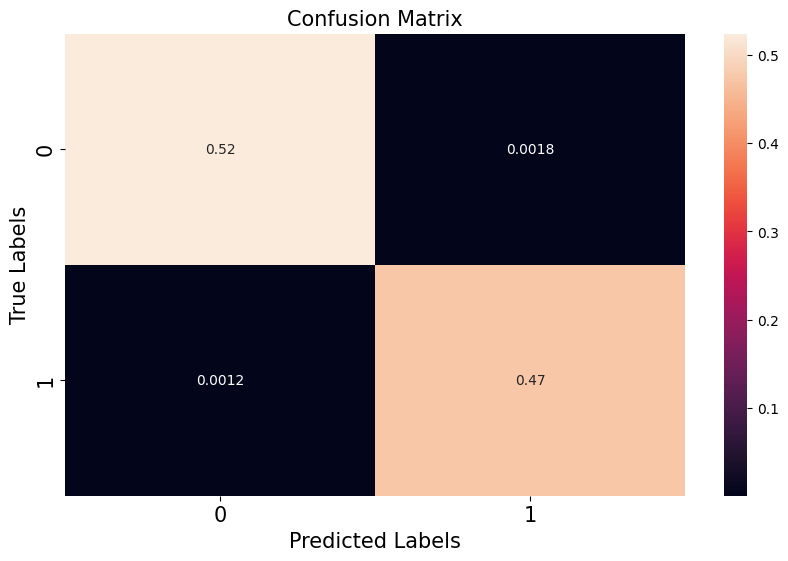

In [15]:
binary_predictions = []

for i in y_pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)
import matplotlib.pyplot as plt
import seaborn as sns
matrix = confusion_matrix(binary_predictions, y_test, normalize='all')
plt.figure(figsize=(10, 6))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=15)
ax.set_ylabel('True Labels', size=15)
ax.set_title('Confusion Matrix', size=15)
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15);

In [16]:
end = time.time()
print(end - start)

726.8843398094177


In [17]:
!pip install translate

In [18]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=81fb3321396efb85ca145f35122e873f091c86ee6c7802c95e3e35d48fb65414
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [21]:
!pip install googletrans==4.0.0rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=066e6039da9efc5623cb53fc9484d9f52e40a3a4931efc7c7d6a4a4d180f5983
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uninstalling ch

In [22]:
from googletrans import Translator

In [26]:
from langdetect import detect


def text_and_translate(user_title, user_text):

    news_text = user_title + " " + user_text

    translator = Translator()

    if detect(news_text) != 'en':
         news_text = translator.translate(news_text, dest='en').text
    # print(news_text)
    return news_text



def predict_fake_or_real(news_text):


    # 전처리 단계
    news_text = preprocessor(news_text)
    news_text = ' '.join(tokenizer_porter(news_text))

    # TF-IDF 변환
    news_vector = tfidf.transform([news_text])

    # 모델을 사용하여 예측
    prediction = clf.predict(news_vector)
    prediction_proba = clf.predict_proba(news_vector)

    if prediction[0] == 0:  # prediction은 배열 형태로 반환되므로 prediction[0]을 사용
        return "Fake News", prediction_proba[0][0] * 100  # 가짜 뉴스일 확률
    else:
        return "Real News", prediction_proba[0][1] * 100  # 진짜 뉴스일 확률


def explain_prediction(news_text, result):


    news_text = preprocessor(news_text)
    news_text = ' '.join(tokenizer_porter(news_text))
    news_vector = tfidf.transform([news_text])

    feature_names = tfidf.get_feature_names_out()
    coefficients = clf.coef_[0]
    words_importance = []

    for idx in news_vector.nonzero()[1]:
        word = feature_names[idx]
        importance = coefficients[idx] * news_vector[0, idx]
        words_importance.append((word, importance))

    words_importance.sort(key=lambda x: abs(x[1]), reverse=True)

    if result == "Fake News":
        return [word for word in words_importance if word[1] < 0][:10]
    else:
        return [word for word in words_importance if word[1] > 0][:10]


while True:

    user_title = input("Please enter a news article title or 0 to exit: ").strip()

    if user_title == '0':
        print("Exiting the program.")
        break

    user_text = input("Please enter the news article text: ").strip()
    news_text = text_and_translate(user_title, user_text)

    result, probability = predict_fake_or_real(news_text)
    explanation = explain_prediction(news_text, result)


    print("This news is:", result)
    print(f"Probability: {probability:.2f}%")
    print("Top 10 influencing words:")
    for word, importance in explanation:
        print(f"{word}: {'supports Fake' if importance < 0 else 'supports Real'} with weight {abs(importance)}")

Please enter a news article title or 0 to exit: 김채현, 이준호 열애
Please enter the news article text: 김채현(22)와 그룹 2pm의 이준호(33)가 공개 열애를 시작했다.  김채현의 소속사 덕성여자대학교는 3일 “좋은 감정으로 서로를 조금씩 알아가고 있는 단계”라며 두 사람의 관계를 인정했다.  이준호의 소속사 jyp엔터테인먼트도 “김채현과 이준호 두 사람이 호감을 갖고 조심스럽게 알아가는 단계”라고 밝혔다.   이날 디스패치는 두 사람이 구리에 있는 김채현의 집에서 데이트했다고 보도했고, 양 측 소속사는 곧이어 교제 사실을 인정했다.  디스패치에 따르면 두 사람은 해외 스케줄을 마치고 돌아오면 대부분의 시간을 집에서 보내는 ‘집순이’ 김채현의 구리 자택에서 주로 데이트를 했다.  두 사람은 연기, 노래, 패션 등에서 공통분모가 많은 것으로 전해졌다.  김채현은 이로써 컴퓨터공학과 중 처음으로 공개 열애를 시작하게 됐다.   한편 이준호가 출연중인 ‘킹더랜드’는 전날 방송된 6회 시청률이 전국 기준 12%(닐슨 코리아)를 기록하는 등 고공 행진 중이다.
This news is: Fake News
Probability: 53.16%
Top 10 influencing words:
the: supports Fake with weight 0.3319399631456758
are: supports Fake with weight 0.29418988392928397
is: supports Fake with weight 0.27499733322420006
dispatch: supports Fake with weight 0.2598647046683744
their: supports Fake with weight 0.24701907644181773
admit: supports Fake with weight 0.23155997411226054
you: supports Fake with weight 0.17776